# Practice

## Libraries

In [7]:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from Resources.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output

## Information About the Dataset
- Information about the dataset `../Data/Gesture-Original.csv` used in the following questions.
- This dataset contains data from 64 muscle sensors `V1 - V64` that are placed on the body of test subjects. In addition, the file contains 2 columns.
- `gesture` always contains the hand gesture performed by a test subject during the measurement of the 64 sensors. The possible values `Pare`, `rock`, `paper`, `scissors`
and `okay`.
- The `okay` column does not contain any new data, but simply indicates whether the subject performed the `okay` hand gesture during the measurement.

In [2]:
# Load in data and filter data
gestureOriginal = pd.read_csv("../Data/Gesture-Original.csv", delimiter=';')

### Question 1:
- Apply linear discriminant analysis to the `../Data/Gesture-Original.csv` dataset.
- `gesture` is the dependent variable.
- Use all other variables as independent variables except the column Okay.

Answer the following questions:
- One of the assumptions for being able to apply LDA is that there is no dependence exists between the independent variables. Show that here or not is met.2. 
- How many discriminant functions are created?
- Why exactly are there so many?
- Which independent variable plays the largest role in the first discriminant function? Please indicate how you got here.

In [3]:
# Create linear discriminant analysis model
# independentVariables = gestureOriginal[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64']]

independentVariables = gestureOriginal.drop(columns=['gesture', 'okay'])                                                        # Independent variables
dependentVariable = gestureOriginal['gesture']                                                                                  # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# independentVariables.describe()
# independentVariables.corr(method='pearson')

# Show some information about the discriminant analysis
print(colored(f"There are {(len(dependentVariable.unique()))-1} dimensions and there are {len(dependentVariable.unique())} different possibilities for the dependent variable and also, there are {len(independentVariables.columns)} independent variables. And there are {min(len(gestureOriginal['gesture'].unique()) - 1, independentVariables.shape[1])} discriminant functions.", outputColor))
print(colored(f"\nThe reason for the number of discriminant functions is that the number of discriminant functions is the minimum of the number of dependent variables and the number of independent variables.", outputColor))

There are 3 dimensions and there are 4 different possibilities for the dependent variable and also, there are 64 independent variables. And there are 3 discriminant functions.

The reason for the number of discriminant functions is that the number of discriminant functions is the minimum of the number of dependent variables and the number of independent variables.


In [4]:
# Determine the most important variable
result = most_important_variable(independentVariables, dependentVariable)

# Print the most important variable
print(colored("The independent variable that plays the most significant role in the first discriminant function is:", outputColor))
print(colored(f"Variable: {result['Variable']}, Coefficient: {result['Coefficient']}", outputColor))

The independent variable that plays the most significant role in the first discriminant function is:
Variable: V39, Coefficient: 0.006181404091898121


### Question 2:
- With 64 independent variables we are dealing with a rather large number.
    - Use proper technique to limit the number of variables.
    - I want to limit myself to 10 variables. What percentage of the information from the original. Can I keep the dataset with this?
    - Explain how you arrived at this number?
    - Create a data set with those 10 variables.
        - Perform a discriminant analysis. Compare the explained variance with that of the previous exercise.

In [5]:
from sklearn.decomposition import PCA

# Limit the number of variables
pca_dim = min(independentVariables.shape[1], independentVariables.shape[0])                                             # Number of dimensions (dependent variables)
pcamodel = PCA(n_components=pca_dim)                                                                                    # Create PCA model
principalComponents = pcamodel.fit_transform(independentVariables)                                                      # Fit and transform the data
col_names = ['PC{}'.format(i) for i in range(1, 11)]                                                                    # Get the column names
new_independentVariables = pd.DataFrame(data=principalComponents[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], columns= col_names) # Create a new dataframe with the principal components

# Conclusion what did we do. We combined the 64 independent variables into 10 principal components, and we used these 10 principal components as independent variables.
print(colored(f"The new dataset contains {new_independentVariables.shape[1]} independent variables.", outputColor))

print(colored(f"We expect to keep {round(pcamodel.explained_variance_ratio_[range(0,10)].sum() * 100, 2)}% of the information from the original dataset.", outputColor))

# Explain how we arrived at this number
print(colored(f"\nWe arrived at this number by calculating the sum of the explained variance ratios of the first 10 principal components.", outputColor))

The new dataset contains 10 independent variables.
We expect to keep 51.83% of the information from the original dataset.

We arrived at this number by calculating the sum of the explained variance ratios of the first 10 principal components.


In [6]:
# Create a new discriminant analysis model
lda_new = LinearDiscriminantAnalysis()
lda_new.fit(new_independentVariables, dependentVariable)

# Compare the lda models with lda_new model
print(colored(f"The first discriminant function of the new model explains {round(lda_new.explained_variance_ratio_[0] * 100, 2)}% of the variance.", outputColor))
print(colored(f"The first discriminant function of the old model explains {round(lda.explained_variance_ratio_[0] * 100, 2)}% of the variance.", outputColor))

print(colored(f"\nThe second discriminant function of the new model explains {round(lda_new.explained_variance_ratio_[1] * 100, 2)}% of the variance.", outputColor))
print(colored(f"The second discriminant function of the old model explains {round(lda.explained_variance_ratio_[1] * 100, 2)}% of the variance.", outputColor))

print(colored(f"\nThe third discriminant function of the new model explains {round(lda_new.explained_variance_ratio_[2] * 100, 2)}% of the variance.", outputColor))
print(colored(f"The third discriminant function of the old model explains {round(lda.explained_variance_ratio_[2] * 100, 2)}% of the variance.", outputColor))

print(colored(f"\nWe can obviously see that the old model with more independent variables can quicker explain more variance than the new model with less independent variables.", outputColor))

The first discriminant function of the new model explains 72.63% of the variance.
The first discriminant function of the old model explains 91.15% of the variance.

The second discriminant function of the new model explains 16.87% of the variance.
The second discriminant function of the old model explains 5.33% of the variance.

The third discriminant function of the new model explains 10.5% of the variance.
The third discriminant function of the old model explains 3.52% of the variance.

We can obviously see that the old model with more independent variables can quicker explain more variance than the new model with less independent variables.


### Question 3:
- We created our own model with more test data to predict whether someone will have it performs `okay` hand gesture. The data is available in `../Data/Gesture-Evaluation.csv`. Note that the predicted values pare not just `0` or `1`, but can be close to `0` or close to `1` or somewhere in between. Take `0.5` as the threshold.

Answer the following questions:
- You want to know how well the model can predict whether the test subject has diabetes performing `okay` gesture. What metric do you use?
- How much is this?
- Calculate the F-measure in which the importance of recall and precision is equal weigh. How much is this?
- Create an ROC curve.
- What is the AUC?
- What can you conclude based on the answer to question?

In [19]:
# Load in data and filter data
gestureEvaluation = pd.read_csv("../Data/Gesture-Evaluation.csv", delimiter=',', decimal='.')
gestureEvaluation.loc[gestureEvaluation.predicted < 0.5, 'predicted'] = 0
gestureEvaluation.loc[gestureEvaluation.predicted >= 0.5, 'predicted'] = 1

Predicted,okay,paper,rock,scissors,Total
actual,,,,,
okay,1093,716,353,759,2921
paper,735,1058,157,953,2903
rock,463,550,1257,640,2910
scissors,825,752,381,985,2943
Total,3116,3076,2148,3337,11677


In [42]:
# Evaluating model
predicted = gestureEvaluation.predicted
actual = gestureEvaluation.actual
confusion_matrix = pd.crosstab(index=actual, columns=predicted)

accuracy = accuracyf(confusion_matrix)

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the classifier is: {round(accuracy, 2) * 100}%\n", outputColor))

f1_0 = f_measuref(confusion_matrix, 1)[0]
f1_1 = f_measuref(confusion_matrix, 1)[1]

# F-measuref: The curved harmonic mean of precision and recall.
print(colored(f"The F1-measure for the class 0 is: {round(f1_0, 2) * 100}%", outputColor))
print(colored(f"The F1-measure for the class 1 is: {round(f1_1, 2) * 100}%", outputColor))
print(colored(f"The F1-measure for all classes is: {round((f1_0 + f1_1) / 2, 2) * 100}%\n", outputColor))

evaluate_classifier(confusion_matrix, 1, 0.9)

The accuracy of the classifier is: 75.0%

The F1-measure for the class 0 is: 83.0%
The F1-measure for the class 1 is: 51.0%
The F1-measure for all classes is: 67.0%

This is a bad classifier with a threshold of 90.0%


The AUC (Area Under the Curve) is: 0.6729833787784725


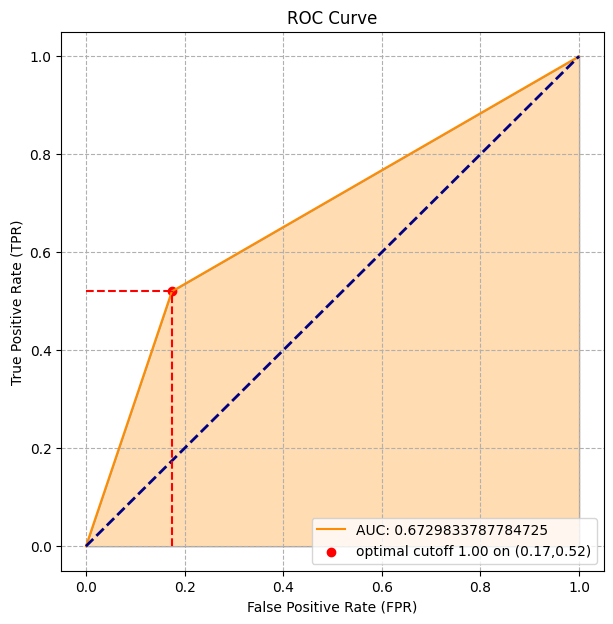

In [40]:
predicted = gestureEvaluation.predicted
actual = gestureEvaluation.actual

# Calculate the AUC (Area Under the Curve)
AUC = roc_auc_score(actual, predicted)
print(colored(f"The AUC (Area Under the Curve) is: {AUC}", outputColor))

# Create a ROC (Receiver Operator Characteristic Curve) diagram.
plot_rocf(actual, predicted, title='ROC Curve')

In [45]:
# Conclusion
print(colored(f"We can draw several conclusions from the results, but the most important one is that the accuracy is quite low at {round(accuracy, 2) * 100}%. However, the AUC is relatively acceptable because it is above 0.5, specifically {AUC}. This means that the model correctly predicts the outcome {round(AUC, 2) * 100}% of the time.", outputColor))

We can draw several conclusions from the results, but the most important one is that the accuracy is quite low at 75.0%. However, the AUC is relatively acceptable because it is above 0.5, specifically 0.6729833787784725. This means that the model correctly predicts the outcome 67.0% of the time.


### Question 4:
Use dataframe `../Data/Gesture-Original.csv` to train an artificial neural network around the column predict `okay`.
- Scale the data with min-max normalization
- Create a neural network model for the entire data set with the following values for the parameters:
    - 4 hidden layers: 32, 16, 8 and 4 neurons
    - learning rate = 0.001
    - epochs=100
    - Make the right choices according to the objective of the ANN - for the other parameters involved correspond to the functions used.

In [56]:
# Load in data and filter data
gestureOriginal = pd.read_csv("../Data/Gesture-Original.csv", delimiter=';')

# Split up the necessary data 
x_gestureOriginal = gestureOriginal.drop(columns=['gesture', 'okay'])                                                                  # Get the input
y_gestureOriginal = gestureOriginal['okay']                                                                                            # Get the output

# Normalize and convert input and output fields
x_gestureOriginal_normalize = (x_gestureOriginal - x_gestureOriginal.min()) / (x_gestureOriginal.max() - x_gestureOriginal.min())      # Normalization of the input

In [59]:
# Create (ANN) artificial neural network
inputs_gestureOriginal = Input(shape=(64,))
x_gestureOriginal_model = Dense(32, activation='sigmoid')(inputs_gestureOriginal)
x_gestureOriginal_model = Dense(16, activation='sigmoid')(x_gestureOriginal_model)
x_gestureOriginal_model = Dense(8, activation='sigmoid')(x_gestureOriginal_model)
x_gestureOriginal_model = Dense(4, activation='sigmoid')(x_gestureOriginal_model)
outputs_gestureOriginal = Dense(1, activation='sigmoid')(x_gestureOriginal_model)
model_gestureOriginal = Model(inputs_gestureOriginal, outputs_gestureOriginal, name='gestureOriginal_NN')                          # Softmax for one-hot encoding (classification)

# Compile the model
model_gestureOriginal.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])    # Binary_crossentropy for one-hot encoding

# Fit the model
history_gestureOriginal = model_gestureOriginal.fit(
                                                x_gestureOriginal_normalize,            # Input
                                                y_gestureOriginal,                      # Output
                                                epochs=100,                             # Number of epochs (epochs = iterations over all the dataset)
                                                callbacks=[PlotLossesKeras()],          # Plot the losses
                                                verbose=False)                          # Fit the model

accuracy
	accuracy         	 (min:    0.750, max:    0.761, cur:    0.761)
Loss
	loss             	 (min:    0.533, max:    0.565, cur:    0.533)


In [60]:
# Get a summary of the model
model_gestureOriginal.summary()

Model: "gestureOriginal_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,357 (32.65 KB)

 Trainable params: 2,785 (10.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,572 (21.77 KB)

In [65]:
# Use the model for prediction
predicted = model_gestureOriginal.predict(x_gestureOriginal_normalize)                                                                  # Predict the output
predicted = np.argmax(predicted, axis=1)                                                                                                # Get the highest value
original = y_gestureOriginal.values                                                                                                     # Get the original output

print(colored(f"Predicted values:  {predicted}", outputColor))
print(colored(f"Original values:   {original}", outputColor))

# Evaluate the model
correct = np.mean(predicted == original)                                                                                                # Get the mean of the correct predictions
print(colored(f"\nThe percentage of gesture original that are correctly classified is: {round(correct, 2) * 100}%", outputColor))

365/365 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
Predicted values:  [0 0 0 ... 0 0 0]
Original values:   [0 0 0 ... 1 1 1]

The percentage of gesture original that are correctly classified is: 75.0%


### Question 5:
We want to solve the following optimization problem without doing the calculations ourselves:
- You have `30` cards, each with its own value: 2, 4, 6, ..., 60.
- You must divide the cards into two piles so that the sum of all values of pile `1`.
- As close as possible to `2` times the sum of stack `2`.

Answer the following questions:
- Solve this problem with a genetic algorithm. Make sure you use the following parameters:
 - popSize=100
 - max_evaluations=5000
 -run=100
 - mutation_rate = 0.1
- Which cards are in pile `1`? Also indicate how you arrived at this.
- How much difference is there between the sum of stack `1` and `2` * the sum of stack `2`?
- Are you sure there isn't a better solution? And why?


Optimal solution: [0.17261392233053247, 0.7535747733605693, 0.4079470970049937, 0.4595074260414576, 0.6154111062657446, 1.0, 0.7539548936915625, 0.5071390390197358, 0.6849651815051032, 0.4985841815099492, 0.759481493101691, 0.43548701830787506, 0.33583814788097954, 0.6771917083174381, 0.4074659108221873, 0.5968315785239273, 0.6755288102208616, 0.5018489734463528, 0.8589251348607224, 0.8842343991744257, 0.8155984162864194, 0.5932353376537081, 0.6331543067628312, 1, 0.8013118745824567, 0.0, 0.693282134234125, 0.6698328574176222, 0.8785941578198401, 0.8781874060402294]
Objective function value: 0.08131958542662687
Stack 1: [ 4 10 12 14 16 18 22 28 32 34 36 38 40 42 44 46 48 50 54 56 58 60]
Stack 2: [ 2  6  8 20 24 26 30 52]
Difference: 0.08131958542662687
There is no better solution possible. This is the optimal solution.


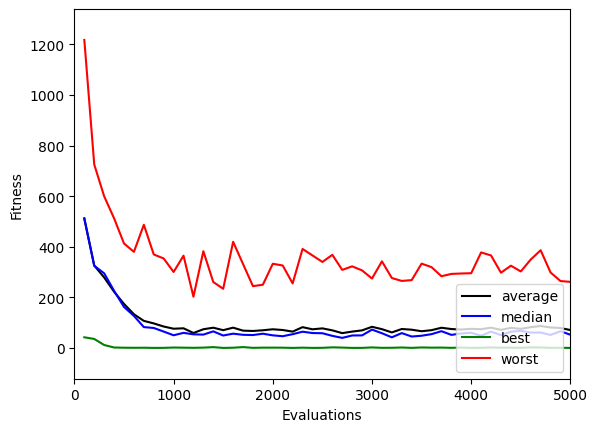

In [81]:
def generate(random = None, args = None):
    return np.random.randint(0, 2, size=len(args.get('cards'))).tolist()

def evaluate(candidates, args = None):
    fitness = []
    values_cards = args.get('cards')
    for candidate in candidates:
        stack1 = (candidate * values_cards).sum()
        stack2 = values_cards.sum() - stack1
        fitness.append(abs(stack1 - 2 * stack2))
    return fitness

cards = np.array(range(2,61,2))
minValue = 0
maxValue = 1

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation]
ga.observer = ec.observers.plot_observer
population = ga.evolve(
    generator = generate,
    evaluator = evaluate,
    selector = ec.selectors.fitness_proportionate_selection,
    pop_size = 100,
    maximize = False, # Minimize
    bounder = ec.Bounder(minValue, maxValue),
    max_evaluations = 5000,
    mutation_rate = 0.1,
    num_inputs = 2,
    run = 100,
    cards = cards)
population.sort(reverse=True)

print(colored(f"Optimal solution: {population[0].candidate}\nObjective function value: {population[0].fitness}", outputColor))

stack1 = cards[np.array(population[0].candidate) > 0.5]     # All the cards in stack 1 are the ones where the candidate is 1 (True)
stack2 = cards[np.array(population[0].candidate) <= 0.5]    # All the cards in stack 2 are the ones where the candidate is 0 (False)

print(colored(f"Stack 1: {stack1}\nStack 2: {stack2}", outputColor))
print(colored(f"Difference: {population[0].fitness}", outputColor))
print(colored(f"There is no better solution possible. This is the optimal solution.", outputColor))